# Part 1: BST Traversal

## Problem 1

In [ ]:
from enum import Enum
from TreeTraversal import BinaryTree, DFSTraversal

class DFSTraversalTypes(Enum):
    PREORDER = 1
    INORDER = 2
    POSTORDER = 3
 

### Demo

In [ ]:
# fill in tree
input_array = [3, 9, 2, 11]
bt = BinaryTree() 
for val in input_array:
    bt.insert(val)

# inorder
print('inorder')
traversal = DFSTraversal(bt, DFSTraversalTypes.INORDER) 
for val in traversal: 
    print(val)
        
# preorder
print('\npreorder')
traversal = DFSTraversal(bt, DFSTraversalTypes.PREORDER)
for val in traversal: 
    print(val)
    
# postorder
print('\npostorder')
traversal = DFSTraversal(bt, DFSTraversalTypes.POSTORDER) 
for val in traversal: 
    print(val)
    
# back to inorder
print('\nswitch from postorder back to inorder')
traversal = DFSTraversal(bt, DFSTraversalTypes.POSTORDER) 
traversal.changeTraversalType(DFSTraversalTypes.INORDER)
for val in traversal: 
    print(val)

# Part 2: Iterators

## Problem 1:

In [48]:
import numpy as np
import random

class Markov:
    def __init__(self, first_day):
        self.data = None
        self.previous_day = first_day
        self.weather = {
            'sunny': 0,
            'cloudy': 1,
            'rainy': 2,
            'snowy': 3,
            'windy': 4,
            'hailing': 5
        }

    def load_data(self, array):
        self.data = array
        
    def get_prob(self, previous_day, following_day):
        before_idx = self.weather[previous_day]
        after_idx = self.weather[following_day]

        try:
            prob = self.data[before_idx][after_idx]
            return prob
        except TypeError: # catch if no data file loaded
            error_msg = 'please load data file first with load_data method'
            return error_msg
        
    def get_weather_for_day(self, day):
        for i in range(day):
            self.previous_day = next(self)
        
        return(next(self))

    def __iter__(self):
        return self

    def __next__(self): 
        try:
            previous_weather_idx = self.weather[self.previous_day]
            next_day_probs = self.data[previous_weather_idx]
            weather_types = list(self.weather.keys())
            next_day = np.random.choice(weather_types, p=next_day_probs)
            return next_day
        
        except IndentationError:
            raise StopIteration

### Quick check

Text(0,0.5,'count')

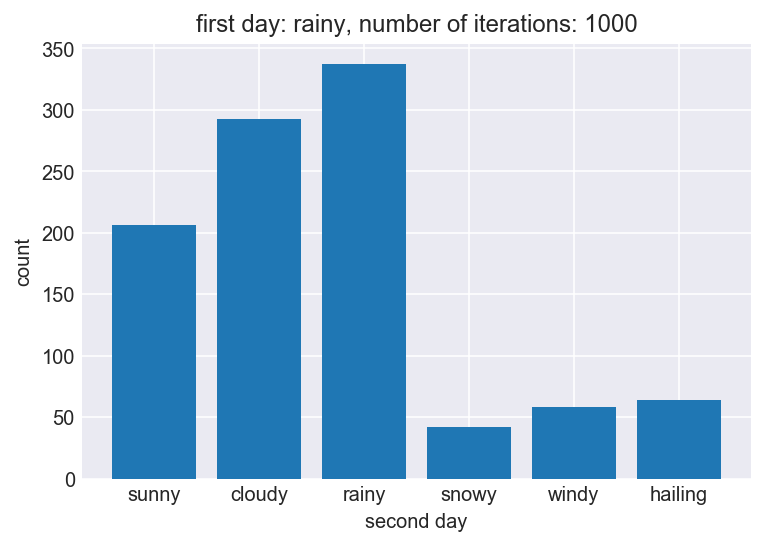

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import collections

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'

weather = np.genfromtxt('weather.csv', delimiter=',')
first_day = 'rainy'
x = Markov(first_day)
x.load_data(weather)

num_iter = 1000
weather_outcomes = []
for i in range(num_iter):
    weather_outcomes.append(next(x))
    
weather_freq = collections.Counter(weather_outcomes)

weather_name_sorted = x.weather.keys()
weather_count_sorted = []
for weather_name in weather_name_sorted:
    weather_count_sorted.append(weather_freq[weather_name])
    
plt.bar(weather_name_sorted, weather_count_sorted)
plt.title(f'first day: {first_day}, number of iterations: {num_iter}')
plt.xlabel('second day')
plt.ylabel('count')

Cool, this checks out with the relative probabilities from the weather data table. Changing `first day` to any of the other weather types seems to also gel with their relevant row in the weather table.

## Problem 2

Added `get_weather_for_day` method to `Markov` class in Problem 1

In [178]:
first_day = 'sunny'
x = Markov(first_day)
x.load_data(weather)

future_weather = []
for i in range(100):
    future = x.get_weather_for_day(7)
    future_weather.append(future)

# check for duplicates
weather_freq = collections.Counter(future_weather)
m = max(weather_freq.values())
common = [weather for weather in weather_freq if weather_freq[weather] == m]
print(common)
print(weather_freq)

['cloudy']
Counter({'cloudy': 30, 'sunny': 27, 'rainy': 17, 'snowy': 11, 'hailing': 8, 'windy': 7})
